In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shrutimechlearn/customer-data")

print("Path to dataset files:", path)

/opt/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/hamzaqadus/.cache/kagglehub/datasets/shrutimechlearn/customer-data/versions/1


In [2]:
import pandas as pd
import os

# Define the dataset path (modify if needed)
dataset_path = "/Users/hamzaqadus/.cache/kagglehub/datasets/shrutimechlearn/customer-data/versions/1"

# List files to find the CSV
print(os.listdir(dataset_path))

# Load the CSV (assuming it's named 'customer_data.csv', check the actual name)
csv_file = os.path.join(dataset_path, "Mall_Customers.csv")
df = pd.read_csv(csv_file)

# Display the DataFrame
df.head()


['Mall_Customers.csv']


,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [5]:
df.dtypes

CustomerID             int64
Genre                 object
Age                    int64
Annual_Income_(k$)     int64
Spending_Score         int64
dtype: object

In [6]:
"Data Dictionary"
#CustomerID: Unique ID assigned to the customer#
#Age: Age of the customer #
# Annual Income (k$): Annual Income of the customer in thousands #
#Spending Score: Spending score of the customer from 1-100 with 100 being the max.#



'Data Dictionary'

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Text(0, 0.5, 'Count')

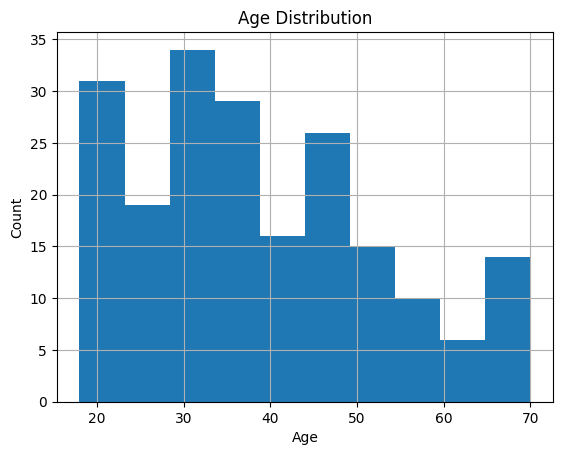

In [8]:
hist = df['Age'].hist(bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

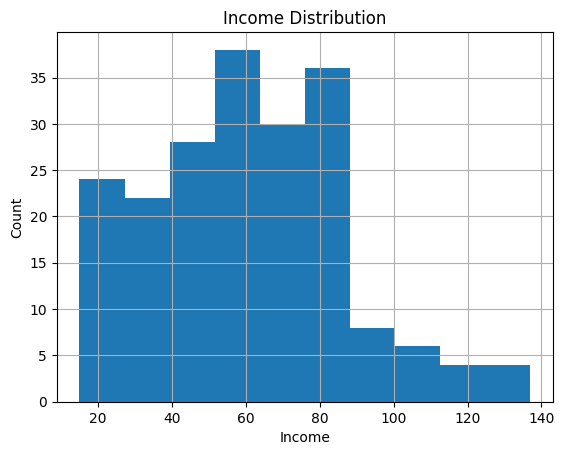

In [9]:
hist = df['Annual_Income_(k$)'].hist(bins=10)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')

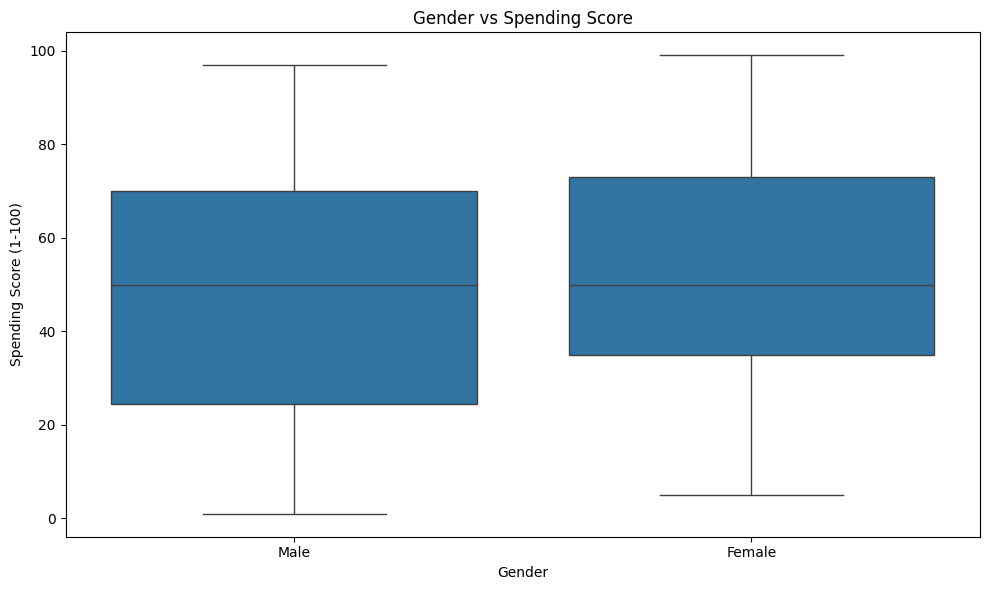

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre', y='Spending_Score', data=df)
# OR for showing all data points:
# sns.stripplot(x='Gender', y='Spending Score', data=df, jitter=True, alpha=0.6)

plt.title('Gender vs Spending Score')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.tight_layout()
plt.show()

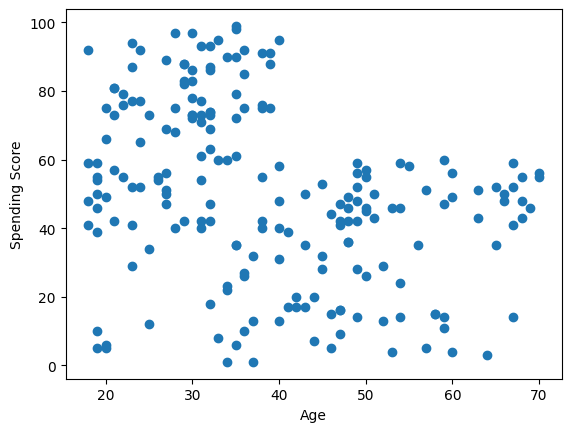

In [11]:
x = df['Age']
y = df['Spending_Score']
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.scatter(x, y)

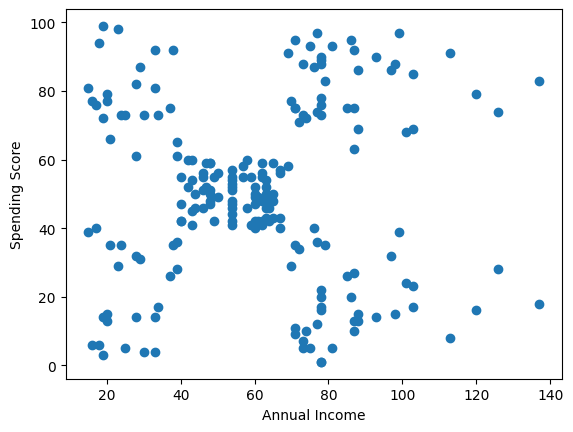

In [12]:
x = df['Annual_Income_(k$)']
y = df['Spending_Score']
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x, y)

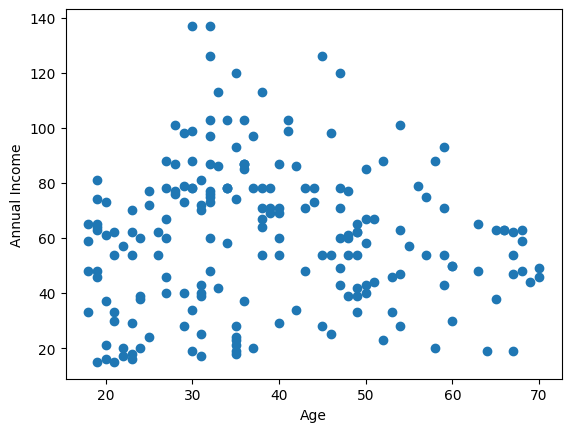

In [13]:
x = df['Age']
y = df['Annual_Income_(k$)']
plt.xlabel('Age') 
plt.ylabel('Annual Income')
plt.scatter(x, y)

                         Age  Annual_Income_(k$)  Spending_Score
Age                 1.000000           -0.012398       -0.327227
Annual_Income_(k$) -0.012398            1.000000        0.009903
Spending_Score     -0.327227            0.009903        1.000000


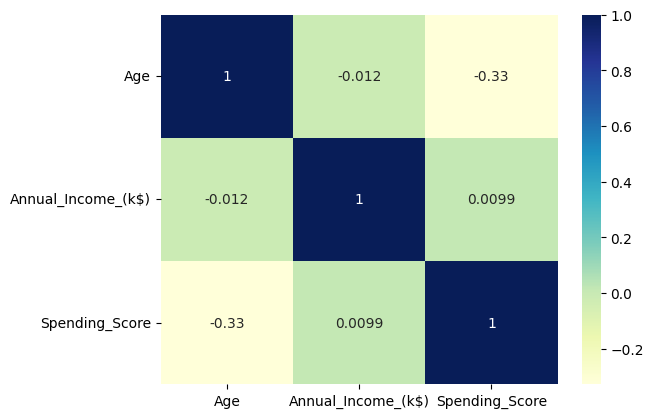

In [17]:
df = df.drop(columns=['CustomerID'])

co_mtx = df.corr(numeric_only=True)
print(co_mtx)

sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)
plt.show()

In [18]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


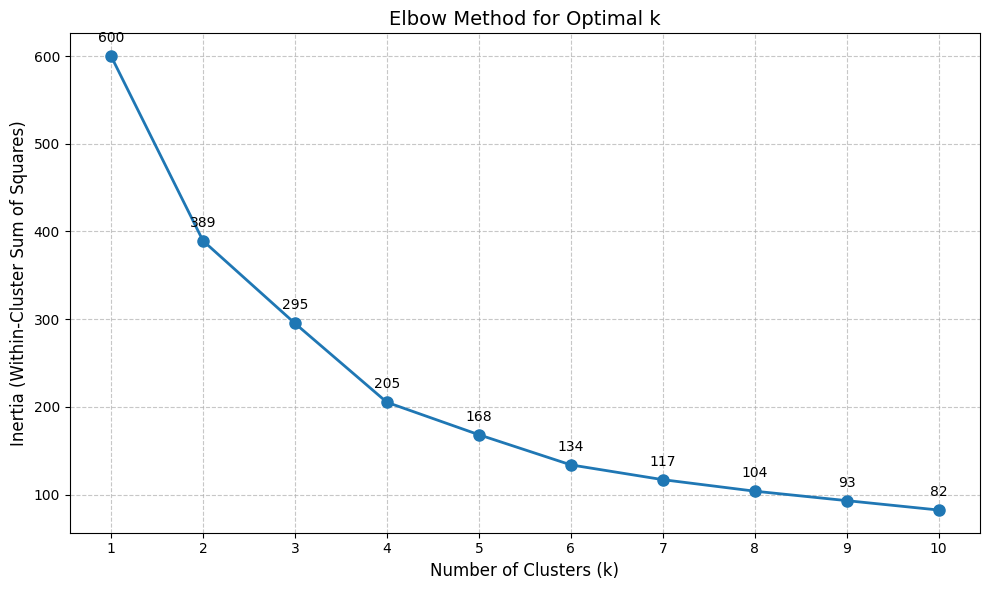

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



# 2. Select the numerical features for clustering
numerical_features = df[['Age', 'Annual_Income_(k$)', 'Spending_Score']]

# 3. Standardize the numerical features
# This ensures that variables with larger scales (like Income) don't dominate
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# 4. Calculate inertia for different numbers of clusters
inertia = []  # Will store the inertia values
k_range = range(1, 11)  # Testing from 1 to 10 clusters

for k in k_range:
    # Create and fit a K-means model
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    
    # Record the inertia (sum of squared distances to closest centroid)
    inertia.append(kmeans.inertia_)

# 5. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.xticks(k_range)  # Set x-axis ticks to each k value
plt.grid(True, linestyle='--', alpha=0.7)

# Add annotations to make the plot more informative
for i, value in enumerate(inertia):
    plt.annotate(f'{value:.0f}', (k_range[i], inertia[i]), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.tight_layout()
plt.show()

# 6. Identify the elbow point visually from the plot
# Look for where the curve bends - that's your optimal k

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


    Genre  Age  Annual_Income_(k$)  Spending_Score  Cluster
0    Male   19                  15              39        2
1    Male   21                  15              81        2
2  Female   20                  16               6        3
3  Female   23                  16              77        2
4  Female   31                  17              40        2


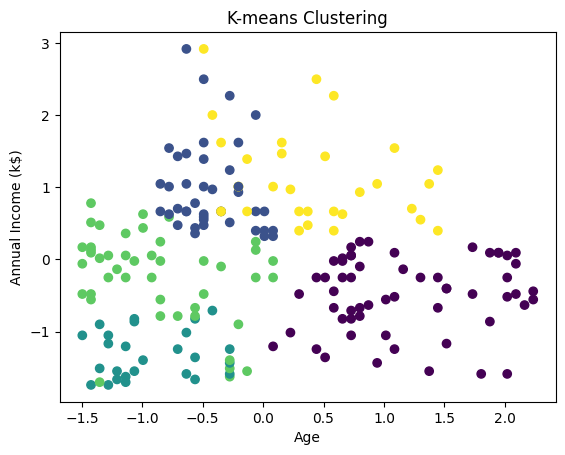

In [27]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



# Drop the column called CustomerID


# Select features for clustering
features = df[['Age', 'Annual_Income_(k$)', 'Spending_Score']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)

# Add cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# Print the first few rows of the dataframe with cluster labels
print(df.head())

# Plot the clusters
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('K-means Clustering')
plt.show()